In [74]:
import torch
import matplotlib.pyplot as plt
from misc import * 
q = torch.distributions.Normal(torch.zeros(1), 1.5*torch.ones(1))
p = Uniform(torch.tensor([-1.5]), torch.tensor([1.5]))
diff = p.upper - p.lower
c = 1/(torch.exp(q.log_prob(p.upper))*diff)
print(c)

tensor([2.0664])


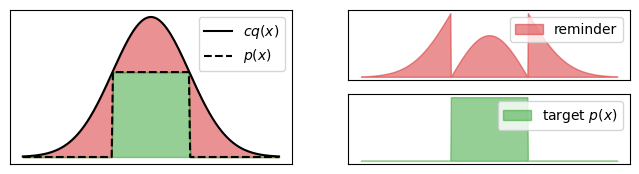

In [104]:
fig = plt.figure(figsize = (1,2))
ax = fig.add_subplot(1, 2, 1)   #top and bottom left
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
tt = torch.linspace(-5,5,200)
plt.plot(tt, c*torch.exp(q.log_prob(tt)),color = 'black', label=r'$c q(x)$')
plt.plot(tt, torch.exp(p.log_prob(tt.unsqueeze(-1))),color = 'black', linestyle ='--',label = r'$p(x)$')
plt.fill_between(tt,torch.exp(p.log_prob(tt.unsqueeze(-1))),c*torch.exp(q.log_prob(tt)), color = 'C3', alpha=.5)
plt.fill_between(tt,torch.exp(p.log_prob(tt.unsqueeze(-1))), color = 'C2', alpha =.5)
plt.legend()
ax = fig.add_subplot(2, 2, 2)   #top right
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
tt = torch.linspace(-5,5,500)
plt.fill_between(tt,torch.exp(q.log_prob(tt))  - torch.exp(p.log_prob(tt.unsqueeze(-1)))/c, color = 'C3', alpha=.5,label = r'reminder')
ax.legend()
ax = fig.add_subplot(2, 2, 4)   #bottom right 
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.fill_between(tt,torch.exp(p.log_prob(tt.unsqueeze(-1)))/c, color = 'C2', alpha =.5, label = r'target $p(x)$')
ax.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


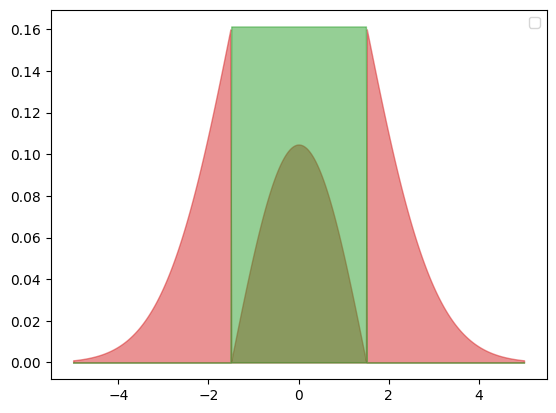

In [76]:
tt = torch.linspace(-5,5,500)
plt.fill_between(tt,torch.exp(q.log_prob(tt))  - torch.exp(p.log_prob(tt.unsqueeze(-1)))/c, color = 'C3', alpha=.5)
plt.fill_between(tt,torch.exp(p.log_prob(tt.unsqueeze(-1)))/c, color = 'C2', alpha =.5)
plt.legend()